In [10]:
# TIC-175476629
import lightkurve as lk

tic = 'tic 37749396'

In [11]:
result = lk.search_targetpixelfile(tic, mission='TESS')

In [12]:
result

#,observation,target_name,productFilename,distance
0,TESS Sector 3,37749396,tess2018263035959-s0003-0000000037749396-0123-s_tp.fits,0.0


In [13]:
tpf = result.download()

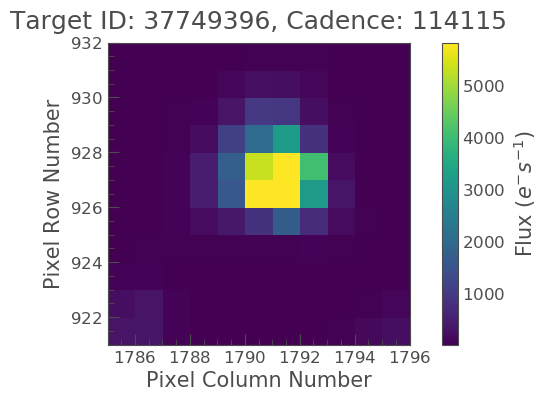

In [14]:
tpf.plot()

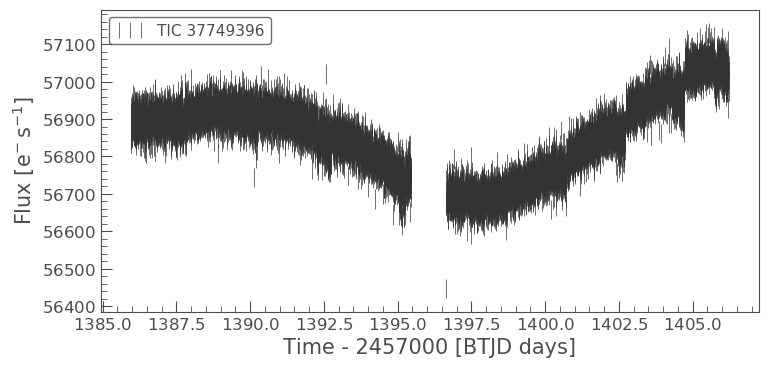

In [17]:
lc = tpf.to_lightcurve().remove_outliers()
lc.errorbar()

In [18]:
lc_shape = lc.time.shape[0]

In [19]:
lc_shape

13452

In [20]:
window_length = (lc_shape * 0.05)
window_length

672.6

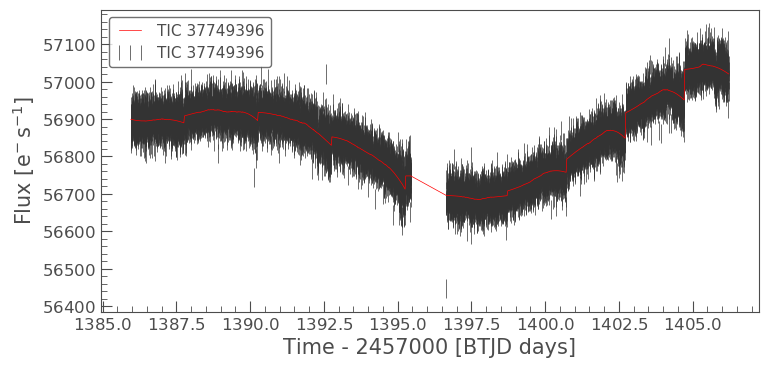

In [48]:
flat_lc, trend = lc.flatten(window_length=673, return_trend=True)
ax = lc.errorbar()
trend.plot(ax=ax, color='red')

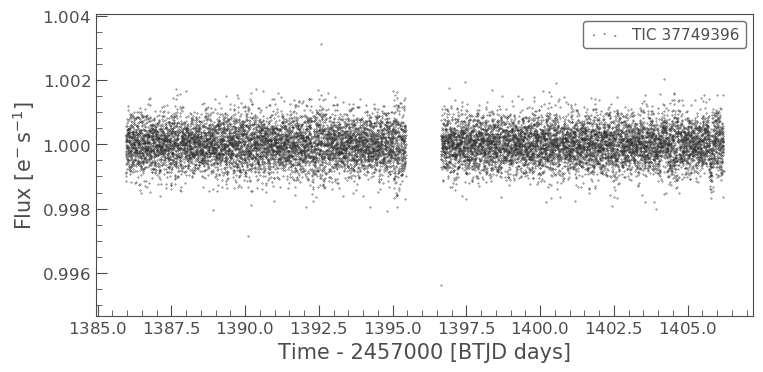

In [49]:
scatter_lc = flat_lc.scatter(s=0.1)

In [41]:
folded_lc = flat_lc.fold(period=13.470018, t0=1392.2944)

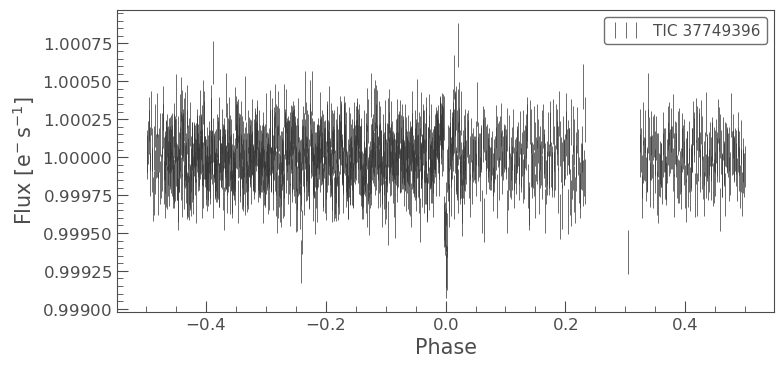

In [54]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.errorbar()